In [1]:
import warnings

warnings.filterwarnings("ignore")

import ast
import itertools
import json
import math
import os
import re
import sys
from collections import Counter
from copy import deepcopy
from functools import reduce
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from networkx.algorithms.shortest_paths.weighted import dijkstra_path_length
from rich import print
from tqdm import tqdm

In [2]:
def plot_mtx(mtx, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.matshow(mtx, cmap=plt.cm.Blues)
    plt.plot()

In [3]:
def read_file_to_str_li(fp, print_exp=True):
    with open(fp, "r") as f:
        lines = f.read().split("\n")
    if print_exp:
        print(f"Read from {fp}:")
        print(f"First line: {lines[0]} | Last line: {lines[-1]}")
        print("-" * 6)

    return lines


# define the function blocks
def convert_to_int(input_str):
    if input_str == "" or input_str == " ":
        return None
    return int(input_str)


def convert_to_str(input_str):
    return str(input_str)


# map the inputs to the function blocks
converts = {
    "i": convert_to_int,
    "s": convert_to_str,
}


def convert_str_li_to_other_li(
    str_li, pattern="i", per_letter=False, sep=" ", start_row=0, end_row=None
):
    """Convert a list of string to a list of other types

    pattern: a list of types for one item.
        'i' for int, 's' for string
        'si' means: convert the 1st item to string, the rest to integer
        If separated items are more than pattern items,
        use the last one from the parttern.
    if per_letter=True, ignore sep and separate item per letter
    """
    target_str_li = str_li[start_row:end_row]
    # find max item num
    max_item_num = 1
    if per_letter:
        max_item_num = max([len(s) for s in target_str_li])
    else:
        max_item_num = max([len(s.split(sep)) for s in target_str_li])

    # extend the pattern to the max itme num
    pattern = (
        pattern + f"{pattern[-1]}" * (max_item_num - len(pattern))
        if max_item_num > len(pattern)
        else pattern
    )

    # convert
    if per_letter:
        return [
            [converts[pattern[idx]](item) for idx, item in enumerate(s)]
            for s in target_str_li
        ]
    else:
        if sep == " ":
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split())]
                for s in target_str_li
            ]
        else:
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split(sep))]
                for s in target_str_li
            ]

In [4]:
fp = "input.txt"
lines = read_file_to_str_li(fp)

print("Convert to:")

# head = convert_str_li_to_other_li(
#     lines, pattern="s", per_letter=True, sep=",", start_row=0, end_row=1
# )

# print(f"Head:\n{head}")
# print(f"First line: {head[0]}")
# print(f"Last line: {head[-1]}")

data = convert_str_li_to_other_li(
    lines, pattern="s", per_letter=True, sep=" ", start_row=None, end_row=None
)


print(f"First line: {data[0]}")
print(f"Last line: {data[-1]}")
print("-" * 6)

Read from input.txt:

First line:                                                   
..#......#.#..............................##.......#.................##.........#.#............#.... | Last line: 
23R40R49L35R17R7L43R8R11L6R28R8L30L40L28R9R22L2R5L6L6R26R27L37L17L29L9R29L42R29L27R4R26R47R11R6R18R43R15R32L13L39L4
6L7R30L23R46R40R44L40L28L25L33R28R3R1R43R43R39L15L6L16R26R17L31L39L41L29L16R41R25R48R17R12R35L9R14R47L22L20R24R45R8
R35L23L46L39R18R34R25R33L38R15L49R24R22L40L11R3R43L18R2L9R10R13R2R15R16L34L34R43R15R4R40R16R19R16R39L40L37R16L32L13
R11R20R25L19L10R29L48L28L38L4L14L12R14R47R18R15L6R20R28L28R8L29L13L7L19L33L48R26R32L34R34R40R8R2L6R20R45R33L36R25R2
7R27R42L34L17L32L5R13L1R9R34R6L13L36R39L38R13L31R32L40L23L23L26R7R34R2R12L24R39L44L30R2L21L15R15R39R10R23R24R34L50L
34L11R6R9R10R50L42L39L20L21R15R10L41R6L50L13L17R23L17R38R18L37L4L14R4R45R36L15R1R37L14L16L19L42R8L35L47R24R20R2L41R
35R3R22R6R20R12R38L4R2R29R24R45R8R3L42L14L41R5L35L24L49R25R35L50R1R8R47L28R41R46R20L9L10R17R27L7L15R25L31L7L22R1R31
L36R2R14R42R4L48R5L19L39L28L9L36R44L46R42L35L16L41L31R5R14L34R35R3L18R5R7L19L30L13R24L13L15R49R14R31R27L40L27R45L8L
19L34R13L43R18R29R4L1L3L2L41R41L7L20R25R33L3L15R15R36R15L33R39R33R36L27R47R6L32R24R8R40R34R3R25L12L49L19L23L21L35L4
1L32L48R2R46L8L3L10L17L25L8R47R10L40L33L4L21L49R16L48R42L23R45R3R29L50L50R41L9L28L36L22L41L7L4L42L45L21R49R19R18R2L
9L42R11R24R38L50R17R30L37L11L22R43R43R27R22R50L22R2L20R40R17L42L19L45R47R45R6R8R22R37L10R24L23R31R43R48L45R2R10R48R
8R31L8L36R39L8L44R1L40L44R33L1L2L42L45R5L1L20L47L23L39L6R23L29R45R11L14R10R36R47R6R15R3R22R22L29L10R32L12L40L21L48R
47L14R9L26R35R23R1L38L43L26R26L4L48R13L39L3L38R47L45R30L16R43L18R19R3R6L5R16L35L15L45R35L35R2L11R6R50R22L36R8L18R44
L19R42R16R45R9R38R8R47R47L10R19L18R14R13R49L29R6R19L40R7L34L7R28L27R31L17R14R28L5R16L48R44L38R33R43R36R28L1L25R28R4
9R31L31R19R30R50L33L16L49L19R31R5R37R45R47R22R40R43L43R9L33R28R33R17L12R25R33R30L35L34R46R23L2L49L39L10R6L35R24L30L
19L41L46R5L35L20L13R32L23R4R34L16R46R9L23L23R26L37R3R47R44L5L43R31R21R36R1L46R18L7L26L34L41L14R35R9L1R18R2R25R9L8L1
9R44R17L46R10R7R24L18R8L2R7R43L20L30L19R31L1L31R25R25R23L5R44R22L46L46R28R31R30R9R6R18R30L3R19L39L35R13R30L11L38R23
R2L24R48R5L3R10R27L48R30R8R40R16L40L37L26L3L15L50R36R15L9L23R29L48R40L6R4L26R25R34L24L38L27R34L10L29L31R23L50R1L49R
1R21R26R4R47R32L15L21L34R36R39R9R29R46R29L13L48L17R16R41L21R9R28L4R35L10R23R38R34R22L12L5R43L9L30R27L8L8L21R26L28R3
8R1R27R10R34R47L6R25L12R48R18R27L22R34L2R42R41L11L12L31R37R39R15L50L50L31L28R1R23R32L6R6L16L12R46R25R34R23L30R48L19
R5L23L43R30R31R15L22L19R50L47L48R4R3R8R14L49L15L26R12R17R11R24R17R3L7L23L39L3L35R49R30L26R23L24R29R41R19L12R48L29L1
4L1L41R28L24L45L12L48L39L30L9R19R16L30R48R37L40L43L12L6L12R16R3L9L36L43L1R22L15R39L17L32R50L10R41L8L29R4R26R8L43R33
L46R18R4R22L1R32R39R7R7R18L42L8R45L29R38L3R41L31R21R42L30R36R35L32L4L47L11L26L28L10R8R31L22L1R2L26R27R49R26L13R45L4
0L42R35L20L28L7L49R8R11L42R47R37R28R6R35R37L27L7R31R24R16R40L40R4R6L30L30L25R37R49L14L37R26R45L5R32L4L36L30L21L45R2
9L5L42L20R46L11R26L35L41L33R19R41R6L40R11L32L2L38R9R35R25L33R19R25R39R50L38L36L32R41R2L30R21R2R22L7R32R42L36L20R22R
32R31R39L43R17L15R13R25R33R27R37R47R35R9L36R32R21R30R30R26L26R25L49R11R23R9L37R5L38R11R46R10L7R33R4R19R29L50R10L20L
49R4L16R7L23L12R18L20L42R20L19R45R2L38L23L17L39R29L44L37L33L2L15L45R28R41L29L18R30L35L4R2L17L34R15L20R37L4R24L20R24
L46L36L48L32L42R15L22R48R14L43R25R39R44L2L32R30L31L29R22R7L10R17R18R6R50L49L24L19L16R40L14R45L36R37R22R25L28L46L18R
36R15L38R39L24L4L4L47R46R5L27L23L28R35R30R11R45L45L17R37L43R40R37R12R43R39L1R40L35L37R30L23L42R37R44R33L39R36L44L50
R5L26L4R36L3R48R25R27L45R8L30L23L2R37R35R19R16L8R28R38R35R25L17L49L45R30L17L27L18L2R49L11R44L18R11L24L10L39L32R4L37
R26L2R24R11R15R37R18R44R12L8L47L45L39L45R42R3L45R1L37L38R7R31L3R29R21L38L45L33L40R43L11R22R45L48L8L23R22R15R20R15R4
5L5R39R22L16R17R33R17R4L35R31R35L40L34L48L40R15R4L3L8L16L39L2R39R45R48R20R5R42R12L15R13R4L43L39R22R29R24L42R42R30L2
6L38L42L33L45L38R21R1R4L13R37R29R22L35L35L27L30L7R31L9R13R2L30L33R15L47R12L11R44L10L29L39R29R29R34R31L15R9R38L

------

Convert to:

First line: [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' 
', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' 
', ' ', ' ', ' ', ' ', ' ', ' ', '.', '.', '#', '.', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '.', 
'.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 
'.', '.', '.', '#', '#', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 
'.', '.', '.', '.', '.', '.', '.', '#', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', 
'.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.']

Last line: ['2', '3', 'R', '4', '0', 'R', '4', '9', 'L', '3', '5', 'R', '1', '7', 'R', '7', 'L', '4', '3', 'R', 
'8', 'R', '1', '1', 'L', '6', 'R', '2', '8', 'R', '8', 'L', '3', '0', 'L', '4', '0', 'L', '2', '8', 'R', '9', 'R', 
'2', '2', 'L', '2', 'R', '5', 'L', '6', 'L', '6', 'R', '2', '6', 'R', '2', '7', 'L', '3', '7', 'L', '1', '7', 'L', 
'2', '9', 'L', '9', 'R', '2', '9', 'L', '4', '2', 'R', '2', '9', 'L', '2', '7', 'R', '4', 'R', '2', '6', 'R', '4', 
'7', 'R', '1', '1', 'R', '6', 'R', '1', '8', 'R', '4', '3', 'R', '1', '5', 'R', '3', '2', 'L', '1', '3', 'L', '3', 
'9', 'L', '4', '6', 'L', '7', 'R', '3', '0', 'L', '2', '3', 'R', '4', '6', 'R', '4', '0', 'R', '4', '4', 'L', '4', 
'0', 'L', '2', '8', 'L', '2', '5', 'L', '3', '3', 'R', '2', '8', 'R', '3', 'R', '1', 'R', '4', '3', 'R', '4', '3', 
'R', '3', '9', 'L', '1', '5', 'L', '6', 'L', '1', '6', 'R', '2', '6', 'R', '1', '7', 'L', '3', '1', 'L', '3', '9', 
'L', '4', '1', 'L', '2', '9', 'L', '1', '6', 'R', '4', '1', 'R', '2', '5', 'R', '4', '8', 'R', '1', '7', 'R', '1', 
'2', 'R', '3', '5', 'L', '9', 'R', '1', '4', 'R', '4', '7', 'L', '2', '2', 'L', '2', '0', 'R', '2', '4', 'R', '4', 
'5', 'R', '8', 'R', '3', '5', 'L', '2', '3', 'L', '4', '6', 'L', '3', '9', 'R', '1', '8', 'R', '3', '4', 'R', '2', 
'5', 'R', '3', '3', 'L', '3', '8', 'R', '1', '5', 'L', '4', '9', 'R', '2', '4', 'R', '2', '2', 'L', '4', '0', 'L', 
'1', '1', 'R', '3', 'R', '4', '3', 'L', '1', '8', 'R', '2', 'L', '9', 'R', '1', '0', 'R', '1', '3', 'R', '2', 'R', 
'1', '5', 'R', '1', '6', 'L', '3', '4', 'L', '3', '4', 'R', '4', '3', 'R', '1', '5', 'R', '4', 'R', '4', '0', 'R', 
'1', '6', 'R', '1', '9', 'R', '1', '6', 'R', '3', '9', 'L', '4', '0', 'L', '3', '7', 'R', '1', '6', 'L', '3', '2', 
'L', '1', '3', 'R', '1', '1', 'R', '2', '0', 'R', '2', '5', 'L', '1', '9', 'L', '1', '0', 'R', '2', '9', 'L', '4', 
'8', 'L', '2', '8', 'L', '3', '8', 'L', '4', 'L', '1', '4', 'L', '1', '2', 'R', '1', '4', 'R', '4', '7', 'R', '1', 
'8', 'R', '1', '5', 'L', '6', 'R', '2', '0', 'R', '2', '8', 'L', '2', '8', 'R', '8', 'L', '2', '9', 'L', '1', '3', 
'L', '7', 'L', '1', '9', 'L', '3', '3', 'L', '4', '8', 'R', '2', '6', 'R', '3', '2', 'L', '3', '4', 'R', '3', '4', 
'R', '4', '0', 'R', '8', 'R', '2', 'L', '6', 'R', '2', '0', 'R', '4', '5', 'R', '3', '3', 'L', '3', '6', 'R', '2', 
'5', 'R', '2', '7', 'R', '2', '7', 'R', '4', '2', 'L', '3', '4', 'L', '1', '7', 'L', '3', '2', 'L', '5', 'R', '1', 
'3', 'L', '1', 'R', '9', 'R', '3', '4', 'R', '6', 'L', '1', '3', 'L', '3', '6', 'R', '3', '9', 'L', '3', '8', 'R', 
'1', '3', 'L', '3', '1', 'R', '3', '2', 'L', '4', '0', 'L', '2', '3', 'L', '2', '3', 'L', '2', '6', 'R', '7', 'R', 
'3', '4', 'R', '2', 'R', '1', '2', 'L', '2', '4', 'R', '3', '9', 'L', '4', '4', 'L', '3', '0', 'R', '2', 'L', '2', 
'1', 'L', '1', '5', 'R', '1', '5', 'R', '3', '9', 'R', '1', '0', 'R', '2', '3', 'R', '2', '4', 'R', '3', '4', 'L', 
'5', '0', 'L', '3', '4', 'L', '1', '1', 'R', '6', 'R', '9', 'R', '1', '0', 'R', '5', '0', 'L', '4', '2', 'L', '3', 
'9', 'L', '2', '0', 'L', '2', '1', 'R', '1', '5', 'R', '1', '0', 'L', '4', '1', 'R', '6', 'L', '5', '0', 'L', '1', 
'3', 'L', '1', '7', 'R', '2', '3', 'L', '1', '7', 'R', '3', '8', 'R', '1', '8', 'L', '3', '7', 'L', '4', 'L', '1', 
'4', 'R', '4', 'R', '4', '5', 'R', '3', '6', 'L', '1', '5', 'R', '1', 'R', '3', '7', 'L', '1', '4', 'L', '1', '6', 
'L', '1', '9', 'L', '4', '2', 'R', '8', 'L', '3', '5', 'L', '4', '7', 'R', '2', '4', 'R', '2', '0', 'R', '2', 'L', 
'4', '1', 'R', '3', '5', 'R', '3', 'R', '2', '2', 'R', '6', 'R', '2', '0', 'R', '1', '2', 'R', '3', '8', 'L', '4', 
'R', '2', 'R', '2', '9', 'R', '2', '4', 'R', '4', '5', 'R', '8', 'R', '3', 'L', '4', '2', 'L', '1', '4', 'L', '4', 
'1', 'R', '5', 'L', '3', '5', 'L', '2', '4', 'L', '4', '9', 'R', '2', '5', 'R', '3', '5', 'L', '5', '0', 'R', '1', 
'R', '8', 'R', '4', '7', 'L', '2', '8', 'R', '4', '1', 'R', '4', '6', 'R', '2', '0', 'L', '9', 'L', '1', '0', 'R', 
'1', '7', 'R', '2', '7', 'L', '7', 'L', '1', '5', 'R', '2',

------

In [5]:
mtx = np.zeros((len(data) - 2, max([len(line) for line in data[:-1]])), dtype="int64")
mtx.shape

(200, 150)

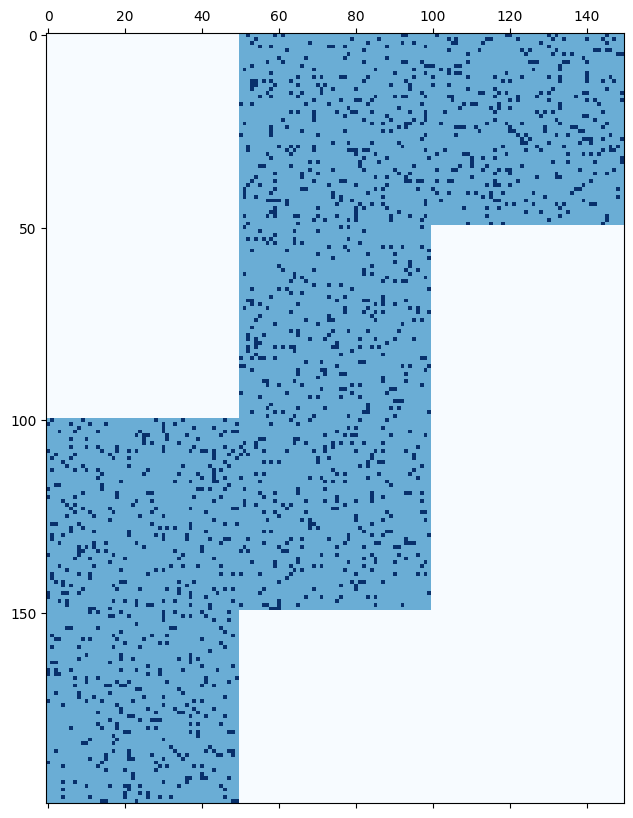

In [6]:
big_num = 999

for i, line in enumerate(data):
    for j, num in enumerate(line):
        if num == ".":
            mtx[i, j] = 1
        elif num == "#":
            mtx[i, j] = 2
plot_mtx(mtx)
mtx[mtx == 2] = big_num  # Use a large number

In [7]:
start_pos = (0, np.where(mtx[0] == 1)[0][0])

In [8]:
# Parse paths
paths = np.array(data[-1])
split_li = np.where(paths == "R")[0].tolist()
split_li += (np.where(paths == "R")[0] + 1).tolist()
split_li += (np.where(paths == "L")[0]).tolist()
split_li += (np.where(paths == "L")[0] + 1).tolist()
split_li.sort()
paths = [int("".join(s)) if s[0].isdigit() else s[0] for s in np.split(paths, split_li)]

In [9]:
def change_dir(direction, turn):
    return (direction + (1 if turn == "R" else 3)) % 4


print(change_dir(0, "L"))
print(change_dir(0, "R"))
print(change_dir(3, "L"))
print(change_dir(3, "R"))

3

1

2

0

In [10]:
def find_first_num_idx(arr, num):
    cum_num = np.cumsum(arr)
    first_nonzero_value = cum_num[np.nonzero(cum_num)[0][0]]
    if first_nonzero_value == big_num:
        return 0
    stop_pos = np.where(cum_num > num)[0][0] - 1
    if stop_pos < 0:
        return 0
    stop_num = cum_num[stop_pos]
    return np.where(cum_num == stop_num)[0][0] + 1


print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 2))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 3))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 4))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 5))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 6))
print(find_first_num_idx(np.array([999, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]), 6))
print(find_first_num_idx(np.array([1, 999, 0, 0, 0, 0, 0, 1, 1, 1, 1]), 6))
print(find_first_num_idx(np.array([1, 999, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 6))
print(find_first_num_idx(np.array([0, 999, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 6))  # 0

2

8

9

10

10

0

1

1

0

In [11]:
# Check if contains "#"
for i in range(mtx.shape[0]):
    if not np.any(mtx[i, :] == big_num):
        print(i)
for j in range(mtx.shape[1]):
    if not np.any(mtx[:, j] == big_num):
        print(j)

In [12]:
def move_pos(pos, direction, move):
    i, j = pos
    if direction == 0:
        arr = np.concatenate([mtx[i, j + 1 :], mtx[i, : j + 1]])
        move = find_first_num_idx(arr, move)
        j = (j + move) % mtx.shape[1]
    elif direction == 1:
        arr = np.concatenate([mtx[i + 1 :, j], mtx[: i + 1, j]])
        move = find_first_num_idx(arr, move)
        i = (i + move) % mtx.shape[0]
    elif direction == 2:
        arr = np.concatenate([np.flip(mtx[i, :j]), np.flip(mtx[i, j:])])
        move = find_first_num_idx(arr, move)
        j = (j + mtx.shape[1] - move) % mtx.shape[1]
    elif direction == 3:
        arr = np.concatenate([np.flip(mtx[:i, j]), np.flip(mtx[i:, j])])
        move = find_first_num_idx(arr, move)
        i = (i + mtx.shape[0] - move) % mtx.shape[0]
    return (i, j)

In [13]:
current_pos = start_pos
current_dir = 0

for p in paths:
    if isinstance(p, int):
        current_pos = move_pos(pos=current_pos, direction=current_dir, move=p)
    else:
        current_dir = change_dir(direction=current_dir, turn=p)

print(
    f"Answer to Q1: {(current_pos[0] + 1) * 1000 + (current_pos[1] + 1) * 4 + current_dir}"
)

Answer to Q1: 190066

In [14]:
mtx_li = []
mtx_li.append(mtx[:50, 50:100])  # 0
mtx_li.append(mtx[0:50, 100:])  # 1
mtx_li.append(mtx[50:100, 50:100])  # 2
mtx_li.append(mtx[100:150, :50])  # 3
mtx_li.append(mtx[100:150, 50:100])  # 4
mtx_li.append(mtx[150:, :50])  # 5

In [15]:
def find_face(pos):
    i, j = pos
    face = 6
    if i < 50 and 50 <= j < 100:
        face = 0
    if i < 50 and j >= 100:
        face = 1
    if 50 <= i < 100 and 50 <= j < 100:
        face = 2
    if 100 <= i < 150 and j < 50:
        face = 3
    if 100 <= i < 150 and 50 <= j < 100:
        face = 4
    if i >= 150 and j < 50:
        face = 5
    if face == 6:
        print("error")
        print(pos)
    return (i % 50, j % 50), face


def relative_to_global(pos, mtx_num):
    if mtx_num == 0:
        det_i = 0
        det_j = 50
    if mtx_num == 1:
        det_i = 0
        det_j = 100
    if mtx_num == 2:
        det_i = 50
        det_j = 50
    if mtx_num == 3:
        det_i = 100
        det_j = 0
    if mtx_num == 4:
        det_i = 100
        det_j = 50
    if mtx_num == 5:
        det_i = 150
        det_j = 0
    return (pos[0] + det_i, pos[1] + det_j)


pos = (90, 60)
relative_to_global(*find_face(pos)) == pos

True

In [16]:
for idx, m in enumerate(mtx_li):
    # Check if contains "#"
    for i in range(m.shape[0]):
        if not np.any(m[i, :] == big_num):
            print(idx)
            print(i)
    for j in range(m.shape[1]):
        if not np.any(m[:, j] == big_num):
            print(idx)
            print(j)

2

30

In [17]:
def move_pos_v2(pos, direction, move):
    i, j = pos
    (loc_i, loc_j), face = find_face(pos)
    if face == 0:
        if direction == 0:
            # 0->1
            new_mtx = np.c_[mtx_li[0], mtx_li[1]]
            arr = new_mtx[loc_i, loc_j + 1 :]
            move = find_first_num_idx(arr, move)
            new_pos = (loc_i, (loc_j + move) % 50)
            mtx_num = (loc_j + move) // 50
            new_pos = relative_to_global(new_pos, mtx_num)
            new_dir = direction
        elif direction == 1:
            # 0->2
            arr = mtx[i + 1 :, j]
            move = find_first_num_idx(arr, move)
            new_pos = ((i + move) % mtx.shape[0], j)
            new_dir = direction
        elif direction == 2:
            # 0->3
            new_mtx = np.c_[np.rot90(mtx_li[3], 2), mtx_li[0]]
            arr = np.flip(new_mtx[loc_i, : loc_j + 50])
            move = find_first_num_idx(arr, move)
            if move <= loc_j:
                new_pos = relative_to_global((loc_i, loc_j - move), 0)
                new_dir = direction
            else:
                new_pos = relative_to_global((49 - loc_i, move - loc_j - 1), 3)
                new_dir = 0
        elif direction == 3:
            # face 0 to 5
            new_mtx = np.r_[np.rot90(mtx_li[5], 1), mtx_li[0]]
            arr = np.flip(new_mtx[: loc_i + 50, loc_j])
            move = find_first_num_idx(arr, move)
            if move <= loc_i:
                new_pos = relative_to_global((loc_i - move, loc_j), 0)
                new_dir = direction
            else:
                new_pos = relative_to_global((loc_j, move - loc_i - 1), 5)
                new_dir = 0

    elif face == 1:
        if direction == 0:
            # 1->4
            new_mtx = np.c_[mtx_li[face], np.rot90(mtx_li[4], 2)]
            arr = new_mtx[loc_i, loc_j + 1 :]
            move = find_first_num_idx(arr, move)
            if loc_j + move < 50:
                new_pos = relative_to_global((loc_i, loc_j + move), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((49 - loc_i, 49 - (loc_j + move - 50)), 4)
                new_dir = 2
        elif direction == 1:
            # 1->2
            new_mtx = np.r_[mtx_li[face], np.rot90(mtx_li[2], 1)]
            arr = new_mtx[loc_i + 1 :, loc_j]
            move = find_first_num_idx(arr, move)
            if move + loc_i < 50:
                new_pos = relative_to_global((loc_i + move, loc_j), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((loc_j, 49 - (move + loc_i - 50)), 2)
                new_dir = 2
        elif direction == 2:
            # 1->0
            arr = np.concatenate([np.flip(mtx[i, :j]), np.flip(mtx[i, j:])])
            move = find_first_num_idx(arr, move)
            j = (j + mtx.shape[1] - move) % mtx.shape[1]
            new_pos = (i, j)
            new_dir = direction
        elif direction == 3:
            # 1->5
            new_mtx = np.r_[mtx_li[5], mtx_li[face]]
            arr = np.flip(new_mtx[: loc_i + 50, loc_j])
            move = find_first_num_idx(arr, move)
            if move <= loc_i:
                new_pos = relative_to_global((loc_i - move, loc_j), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((50 - (move - loc_i), loc_j), 5)
                new_dir = 3
    elif face == 2:
        if direction == 0:
            # 2->1
            new_mtx = np.c_[mtx_li[face], np.rot90(mtx_li[1], 3)]
            arr = new_mtx[loc_i, loc_j + 1 :]
            move = find_first_num_idx(arr, move)
            if loc_j + move < 50:
                new_pos = relative_to_global((loc_i, loc_j + move), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((49 - (loc_j + move - 50), loc_i), 1)
                new_dir = 3
        elif direction == 1:
            # 2->4
            arr = np.concatenate([mtx[i + 1 :, j], mtx[: i + 1, j]])
            move = find_first_num_idx(arr, move)
            i = (i + move) % mtx.shape[0]
            new_pos = (i, j)
            new_dir = direction
        elif direction == 2:
            # 2->3
            new_mtx = np.c_[np.rot90(mtx_li[3], 3), mtx_li[face]]
            arr = np.flip(new_mtx[loc_i, : loc_j + 50])
            move = find_first_num_idx(arr, move)
            if move <= loc_j:
                new_pos = relative_to_global((loc_i, loc_j - move), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((move - loc_j - 1, loc_i), 3)
                new_dir = 1
        elif direction == 3:
            # 2->0
            arr = np.concatenate([np.flip(mtx[:i, j]), np.flip(mtx[i:, j])])
            move = find_first_num_idx(arr, move)
            i = (i + mtx.shape[0] - move) % mtx.shape[0]
            new_pos = (i, j)
            new_dir = direction
    elif face == 3:
        if direction == 0:
            # 3->4
            arr = np.concatenate([mtx[i, j + 1 :], mtx[i, : j + 1]])
            move = find_first_num_idx(arr, move)
            j = (j + move) % mtx.shape[1]
            new_pos = (i, j)
            new_dir = direction
        elif direction == 1:
            # 3->5
            arr = np.concatenate([mtx[i + 1 :, j], mtx[: i + 1, j]])
            move = find_first_num_idx(arr, move)
            i = (i + move) % mtx.shape[0]
            new_pos = (i, j)
            new_dir = direction
        elif direction == 2:
            # 3->0
            new_mtx = np.c_[np.rot90(mtx_li[0], 2), mtx_li[face]]
            arr = np.flip(new_mtx[loc_i, : loc_j + 50])
            move = find_first_num_idx(arr, move)
            if move <= loc_j:
                new_pos = relative_to_global((loc_i, loc_j - move), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((49 - loc_i, move - loc_j - 1), 0)
                new_dir = 0
        elif direction == 3:
            # 3->2
            new_mtx = np.r_[np.rot90(mtx_li[2], 1), mtx_li[face]]
            arr = np.flip(new_mtx[: loc_i + 50, loc_j])
            move = find_first_num_idx(arr, move)
            if move <= loc_i:
                new_pos = relative_to_global((loc_i - move, loc_j), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((loc_j, move - loc_i - 1), 2)
                new_dir = 0
    elif face == 4:
        if direction == 0:
            # 4->1
            new_mtx = np.c_[mtx_li[face], np.rot90(mtx_li[1], 2)]
            arr = new_mtx[loc_i, loc_j + 1 :]
            move = find_first_num_idx(arr, move)
            if loc_j + move < 50:
                new_pos = relative_to_global((loc_i, loc_j + move), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((49 - loc_i, 49 - (loc_j + move - 50)), 1)
                new_dir = 2
        elif direction == 1:
            # 4->5
            new_mtx = np.r_[mtx_li[face], np.rot90(mtx_li[5], 1)]
            arr = new_mtx[loc_i + 1 :, loc_j]
            move = find_first_num_idx(arr, move)
            if move + loc_i < 50:
                new_pos = relative_to_global((loc_i + move, loc_j), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((loc_j, 49 - (move + loc_i - 50)), 5)
                new_dir = 2
        elif direction == 2:
            # 4->3
            arr = np.concatenate([np.flip(mtx[i, :j]), np.flip(mtx[i, j:])])
            move = find_first_num_idx(arr, move)
            j = (j + mtx.shape[1] - move) % mtx.shape[1]
            new_pos = (i, j)
            new_dir = direction
        elif direction == 3:
            # 4->2
            arr = np.concatenate([np.flip(mtx[:i, j]), np.flip(mtx[i:, j])])
            move = find_first_num_idx(arr, move)
            i = (i + mtx.shape[0] - move) % mtx.shape[0]
            new_pos = (i, j)
            new_dir = direction
    elif face == 5:
        if direction == 0:
            # 5->4
            new_mtx = np.c_[mtx_li[face], np.rot90(mtx_li[4], 3)]
            arr = new_mtx[loc_i, loc_j + 1 :]
            move = find_first_num_idx(arr, move)
            if loc_j + move < 50:
                new_pos = relative_to_global((loc_i, loc_j + move), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((49 - (loc_j + move - 50), loc_i), 4)
                new_dir = 3
        elif direction == 1:
            # 5->1
            new_mtx = np.r_[mtx_li[face], mtx_li[1]]
            arr = new_mtx[loc_i + 1 :, loc_j]
            move = find_first_num_idx(arr, move)
            if move + loc_i < 50:
                new_pos = relative_to_global((loc_i + move, loc_j), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((move + loc_i - 50, loc_j), 1)
                new_dir = 1
        elif direction == 2:
            # 5->0
            new_mtx = np.c_[np.rot90(mtx_li[0], 3), mtx_li[face]]
            arr = np.flip(new_mtx[loc_i, : loc_j + 50])
            move = find_first_num_idx(arr, move)
            if move <= loc_j:
                new_pos = relative_to_global((loc_i, loc_j - move), face)
                new_dir = direction
            else:
                new_pos = relative_to_global((move - loc_j - 1, loc_i), 0)
                new_dir = 1
        elif direction == 3:
            # 5->3
            arr = np.concatenate([np.flip(mtx[:i, j]), np.flip(mtx[i:, j])])
            move = find_first_num_idx(arr, move)
            i = (i + mtx.shape[0] - move) % mtx.shape[0]
            new_pos = (i, j)
            new_dir = direction
    else:
        print(pos, direction, move)
    return new_pos, new_dir

In [18]:
current_pos = start_pos
current_dir = 0

for p in paths:
    if isinstance(p, int):
        current_pos, current_dir = move_pos_v2(
            pos=current_pos, direction=current_dir, move=p
        )
    else:
        current_dir = change_dir(direction=current_dir, turn=p)

print(
    f"Answer to Q2: {(current_pos[0] + 1) * 1000 + (current_pos[1] + 1) * 4 + current_dir}"
)

Answer to Q2: 134170